## Single hidden-layer ANN
$X_i^l$ is the $i^{th}$ input from $l^{th}$ layer; specially, $X_i^1$ is observations (i.e. input layer). the input from $l^{th}$ layer have $k_l$ elements ,that is, $(X_i^l)_j$ is the $j^{th}$ element with $j \in [1,k_l] $. For the convience of later deduction, we define:
$$X_i^l\prime = 
\begin{bmatrix}
  1 \\
  X_i^l
  \end{bmatrix}$$

$W^l$ is the weight matrix between $l^{th}$ layer and $(l+1)^{th}$ layer. $W_{p \cdot}$ is the $p^{th}$ row of $W$, likewise, $W_{\cdot q}$ is the $q^{th}$ column of $W$. For example, we have $W^1_{1 \cdot} X_i^1\prime = (X_i^2)_1$

$Y_i$ is the observed label of $X_i^1$. In the case of single hidden-layer ANN, without consideration of activation, $\hat{Y_i}$ is estimted by $X_i^2$

To minimise MSE $\sum_i^{k_2}(Y_i-\hat{Y_i})^2$ equals to solve normal equation. Below is the detailed deduction: 
<div class="alert alert-block alert-info">
<b>Missing:</b> It will be typed later
</div>

Conclusion: when sample size goes toward infinity, the rank converge to $min(k1,k2)$, i.e. $\lim_{n \rightarrow \infty} rank(X^TX)\rightarrow min(k1,k2)$, thus larger sample size will smooth the loss function.

## Theory Validation 
- data generation: 2D linear separable data, with dim(output)=1
- single layer perceptron building

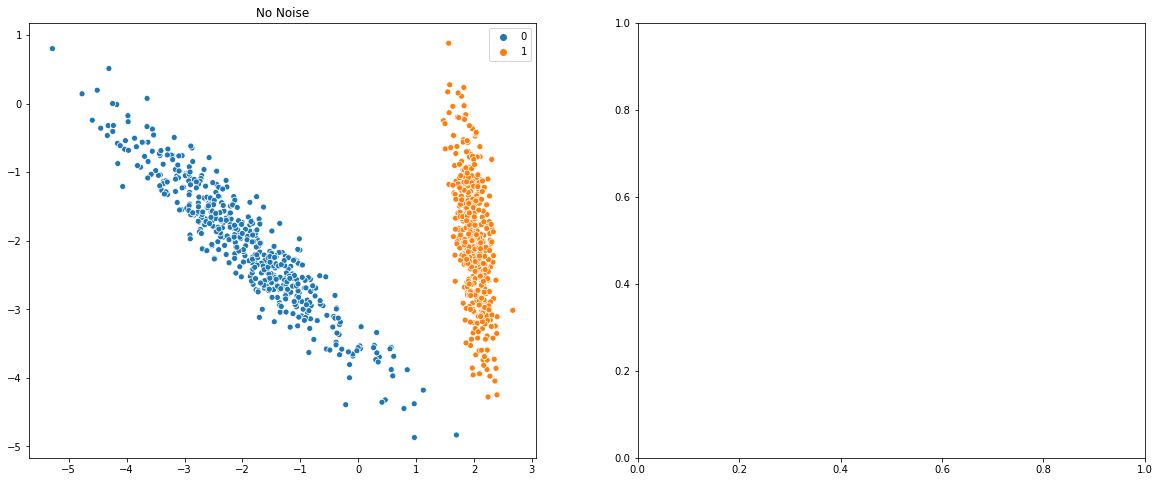

In [94]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
# Generate Clean data
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
# # Generate noisy Data - for later test
# X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)
# sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
# ax2.set_title("With Noise");
# plt.show();

In [95]:
import torch.nn
import copy
import torch.optim as optim
from tqdm import tqdm
class singleL_ANN(torch.nn.Module):
    """ single hidden layer that is as well output layer """
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.linear_1 = torch.nn.Linear(x_dim, y_dim)

    def forward(self, x):
        h = self.linear_1(x)
        return h

def train(model, optimizer, criterion, train_loader,y, epochs):
    """ Trains the given model with the given optimizer, loss function, etc. """
    #self loop
    model.train()
    # train model
    for _ in tqdm(range(epochs), 'Training'):
        for i in range(len(y)):
            optimizer.zero_grad()
            pred = model(X[i])
            loss = criterion(pred, y[i])
            loss.backward()
            optimizer.step()

    model.eval()

x_dim = 2
y_dim = 1
SANN = singleL_ANN(x_dim ,y_dim)


# use SGD for each iteration with initial lr and momentum
optimizer = optim.SGD(SANN.parameters(),lr=0.01, momentum=0.9)
# MSE-normal equation
criterion = torch.nn.MSELoss()
SANN_initial = copy.deepcopy(SANN)

#convert types
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
# train_loader = torch.utils.data.DataLoader(X, batch_size=1, shuffle=False)

train(SANN, optimizer, criterion, X,y, 20)

SANN_final = copy.deepcopy(SANN)

Training: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.29s/it]


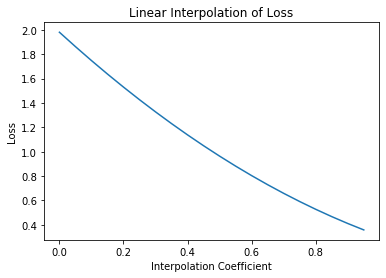

In [96]:
import loss_landscapes
import loss_landscapes.metrics
X_1 = iter(train_loader).__next__()
y_1 = iter(y).__next__()
metric = loss_landscapes.metrics.Loss(criterion, X_1, y_1)

# compute loss data
steps=20
loss_data = loss_landscapes.linear_interpolation(SANN_initial, SANN_final, metric, steps, deepcopy_model=True)

plt.plot([1/steps * i for i in range(steps)], loss_data)
plt.title('Linear Interpolation of Loss')
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
axes = plt.gca()
# axes.set_ylim([2.300,2.325])
plt.show()

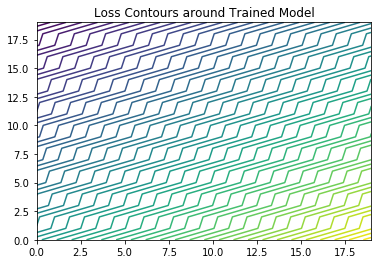

In [97]:
loss_data_fin = loss_landscapes.random_plane(SANN_final, metric, 10, steps, normalization='filter', deepcopy_model=True)
plt.contour(loss_data_fin, levels=50)
plt.title('Loss Contours around Trained Model')
plt.show()

f:\software\2python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


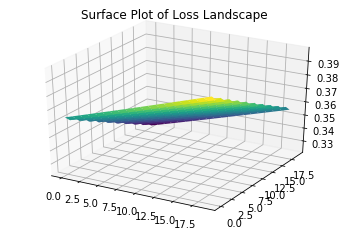

In [98]:
from mpl_toolkits import mplot3d
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(steps)] for i in range(steps)])
Y = np.array([[i for _ in range(steps)] for i in range(steps)])
ax.plot_surface(X, Y, loss_data_fin, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Loss Landscape')
fig.show()
